In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matpl
from tensorflow.keras.layers import Conv1D,LSTM,Bidirectional,Dense
from tensorflow.keras.models import Sequential

In [47]:
data =  pd.read_csv("/content/webtraffic.csv")

In [48]:
data

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737
...,...,...
4891,4891,2555880561
4892,4892,2454084459
4893,4893,2405182410
4894,4894,2356280361


In [49]:
data.shape

(4896, 2)

In [97]:
sessions = data['Sessions'].values

In [98]:
sessions

array([1418159421, 1113769116,  919158921, ..., 2405182410, 2356280361,
       1987019991])

In [99]:
time = np.arange(len(sessions))

In [100]:
time

array([   0,    1,    2, ..., 4893, 4894, 4895])

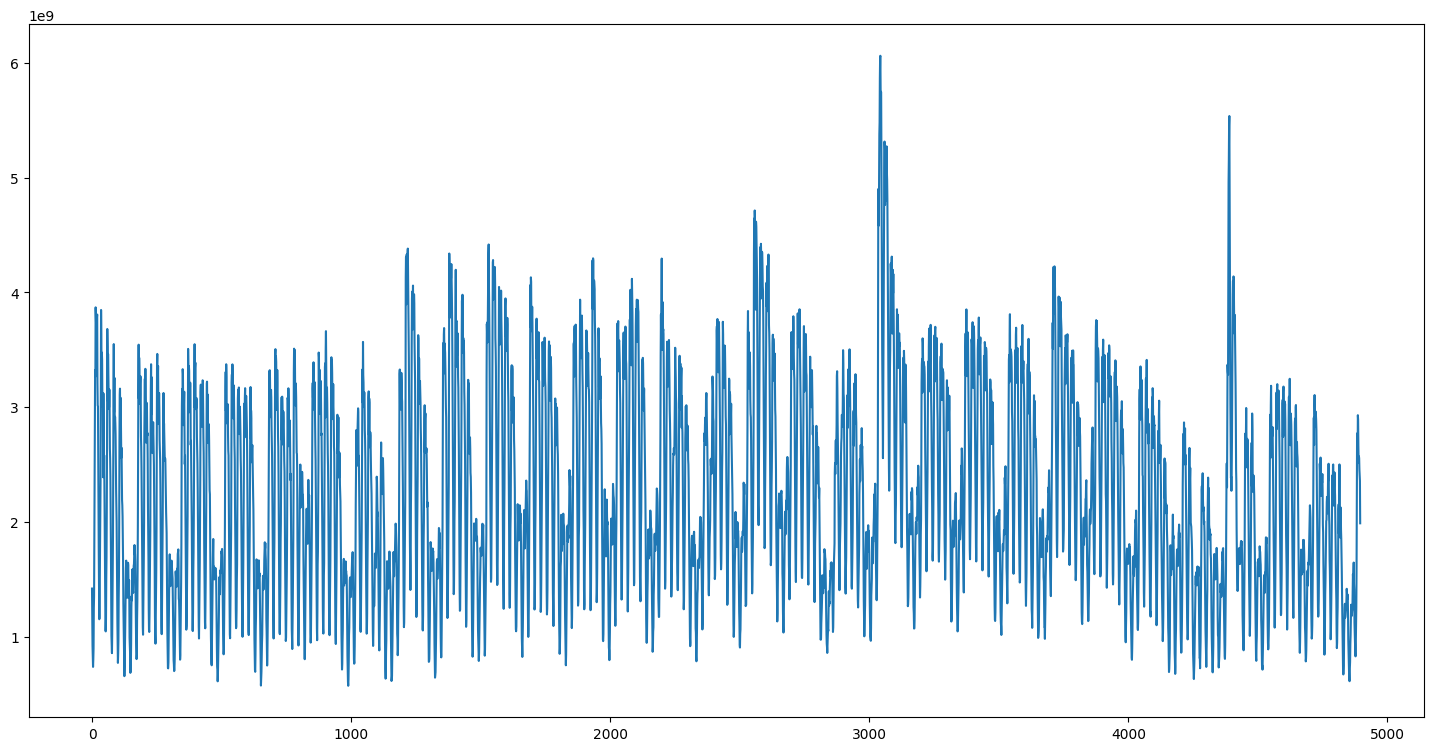

In [102]:
plt.figure(figsize=(18,9))
plt.plot(time, sessions)
plt.show()

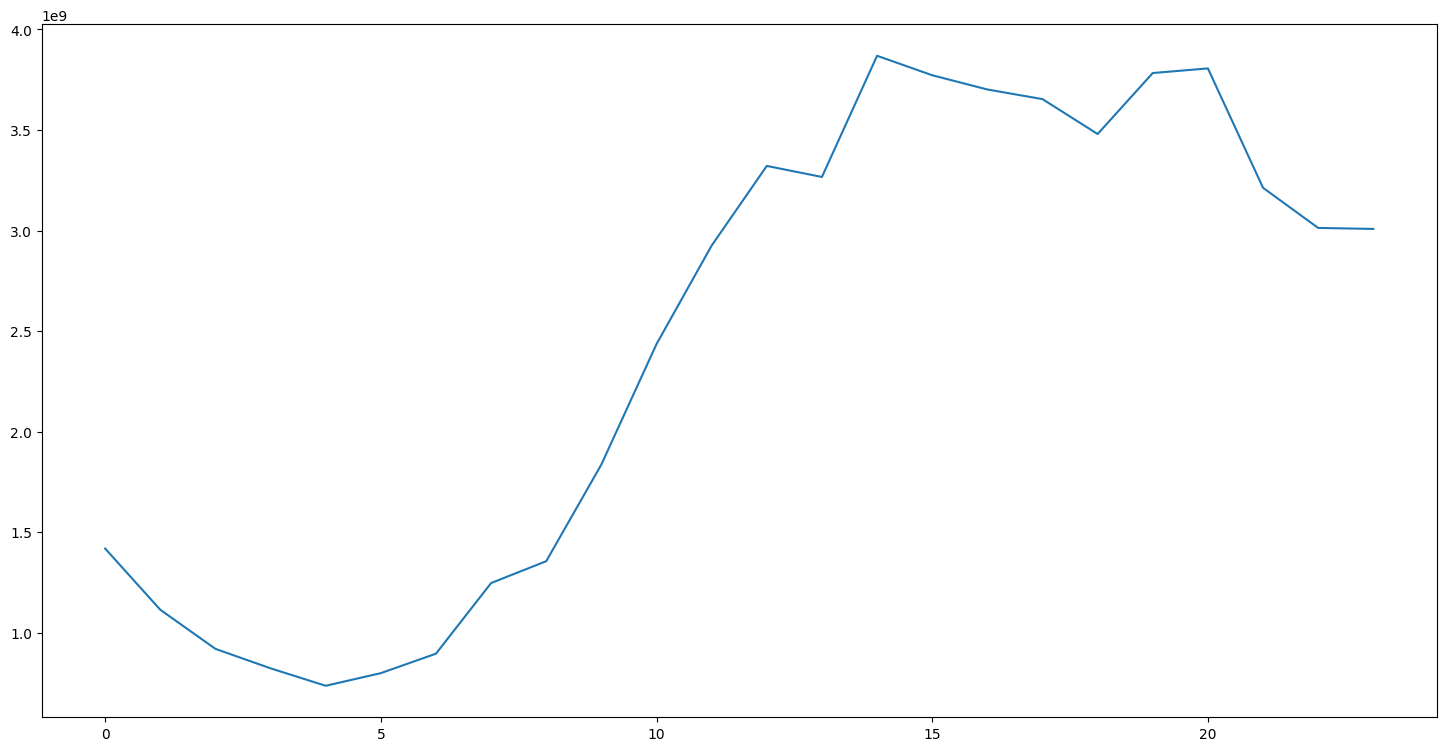

In [103]:
day1 = sessions[:24]
time1 = np.arange(len(day1))
plt.figure(figsize=(18,9))
plt.plot(time1, day1)
plt.show()

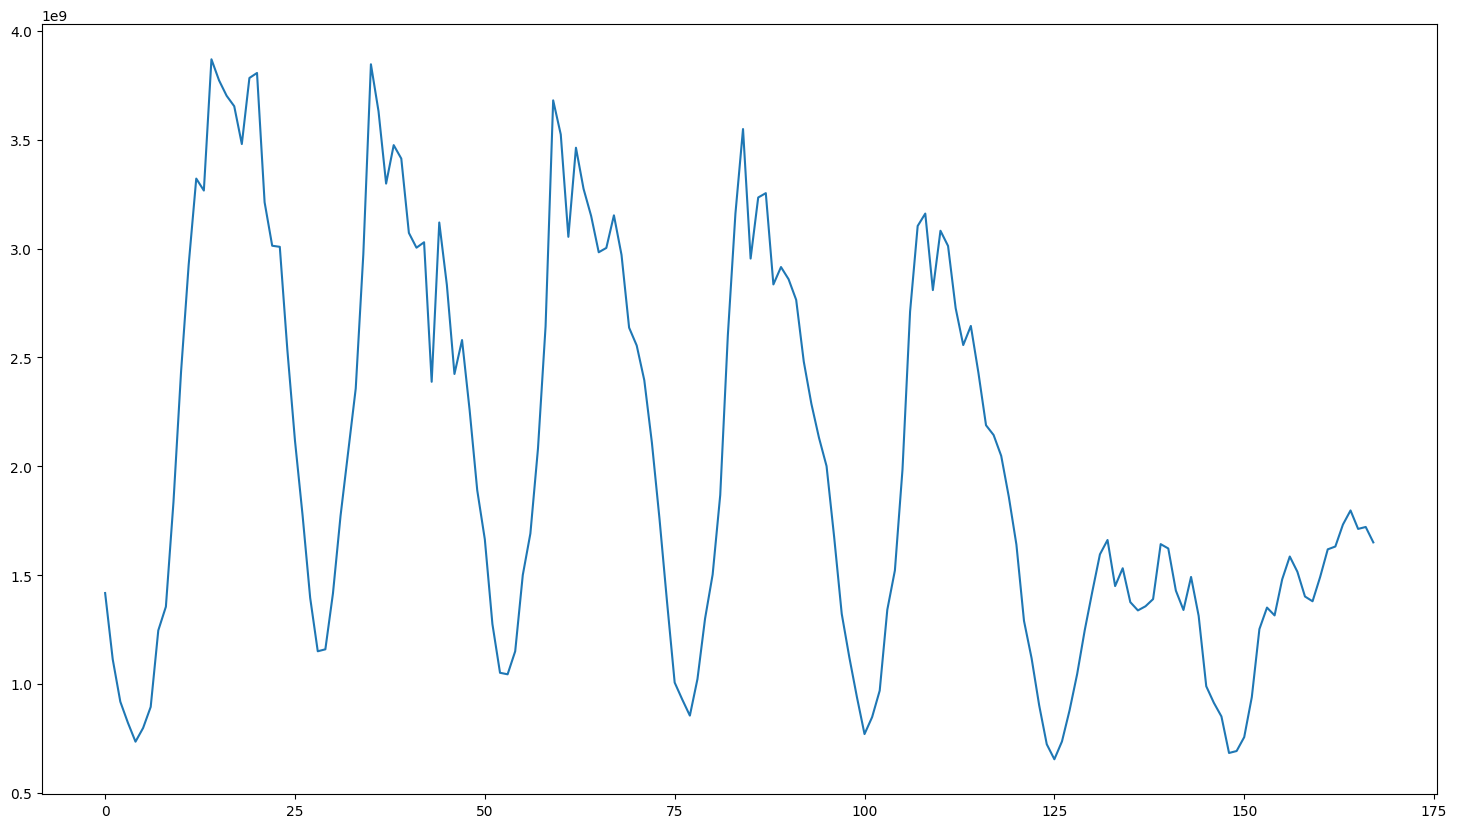

In [104]:
week1 = sessions[:168]
time2 = np.arange(len(week1))
plt.figure(figsize=(18,10))
plt.plot(time2, week1)
plt.show()

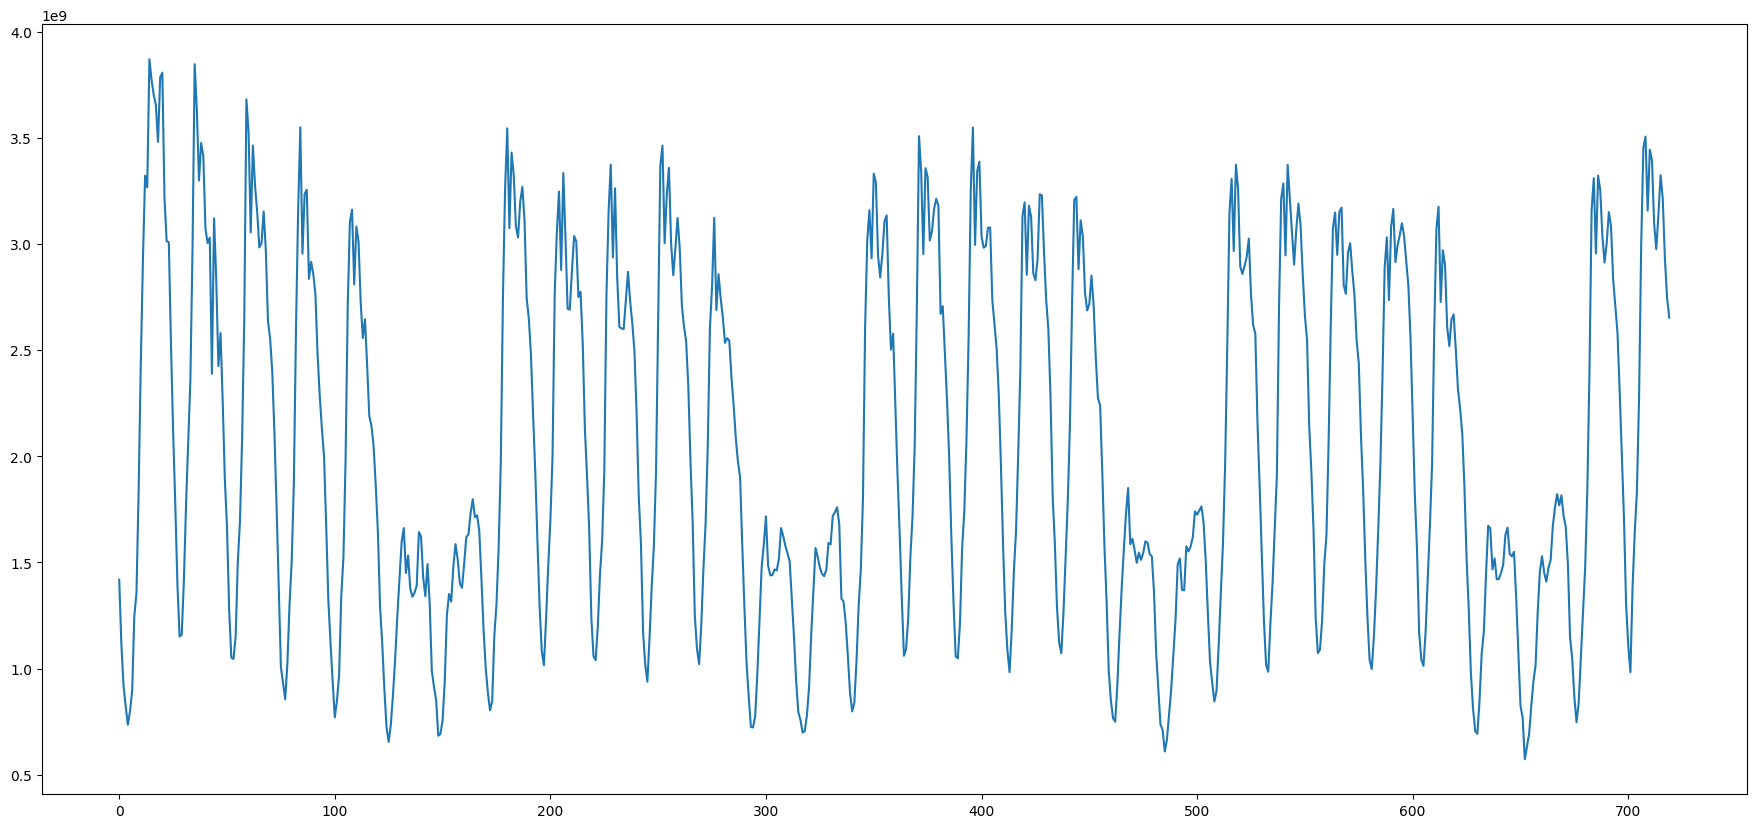

In [105]:
month1 =  sessions[:720]
time3 = np.arange(len(month1))
plt.figure(figsize=(22,10))
plt.plot(time3, month1)
plt.show()

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
sessions = scaler.fit_transform(sessions.reshape(-1, 1))

In [60]:
train = sessions[:4200]
test = sessions[4201:]

In [61]:
def timeseriesgenerator(array, seq_length):
  x = []
  y = []
  for i in range(0,len(array) - seq_length ):
    x.append(array[i:i + seq_length])
    y.append(array[i + seq_length ])
  return np.array(x),np.array(y)

In [62]:
x_train , y_train =  timeseriesgenerator(train, 168)
x_test , y_test = timeseriesgenerator(test,168)

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4032, 168, 1)
(4032, 1)
(527, 168, 1)
(527, 1)


In [64]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4032, 168, 1)
(4032, 1)
(527, 168, 1)
(527, 1)


In [66]:
model = Sequential([
    Conv1D(filters=64, input_shape = [168,1],kernel_size=3,activation="relu"),
    Bidirectional(LSTM(64, return_sequences=True)),
    LSTM(32,return_sequences = True),
    LSTM(20),
    Dense(10,activation = 'relu'),
    Dense(1,activation = 'relu')
])

In [67]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['mae'])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 166, 64)           256       
                                                                 
 bidirectional_2 (Bidirectio  (None, 166, 128)         66048     
 nal)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 166, 32)           20608     
                                                                 
 lstm_8 (LSTM)               (None, 20)                4240      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                      

In [71]:
from keras.callbacks import ModelCheckpoint

In [74]:
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [75]:
model.fit(x = x_train,y = y_train ,epochs = 30,callbacks=callbacks)

Epoch 1/30
126/126 [==============================] - ETA: 0s - loss: 3.1624e-04 - mae: 0.0133
Epoch 1: loss improved from inf to 0.00032, saving model to my_best_model.hdf5
126/126 [==============================] - 4s 29ms/step - loss: 3.1624e-04 - mae: 0.0133
Epoch 2/30
126/126 [==============================] - ETA: 0s - loss: 3.5429e-04 - mae: 0.0138
Epoch 2: loss did not improve from 0.00032
126/126 [==============================] - 3s 24ms/step - loss: 3.5429e-04 - mae: 0.0138
Epoch 3/30
125/126 [============================>.] - ETA: 0s - loss: 3.3845e-04 - mae: 0.0138
Epoch 3: loss did not improve from 0.00032
126/126 [==============================] - 3s 24ms/step - loss: 3.3986e-04 - mae: 0.0138
Epoch 4/30
125/126 [============================>.] - ETA: 0s - loss: 3.3965e-04 - mae: 0.0138
Epoch 4: loss did not improve from 0.00032
126/126 [==============================] - 3s 25ms/step - loss: 3.4910e-04 - mae: 0.0138
Epoch 5/30
126/126 [==============================] - ET

In [76]:
y_pred = model.predict(x_test)

17/17 [==============================] - 2s 17ms/step


In [77]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

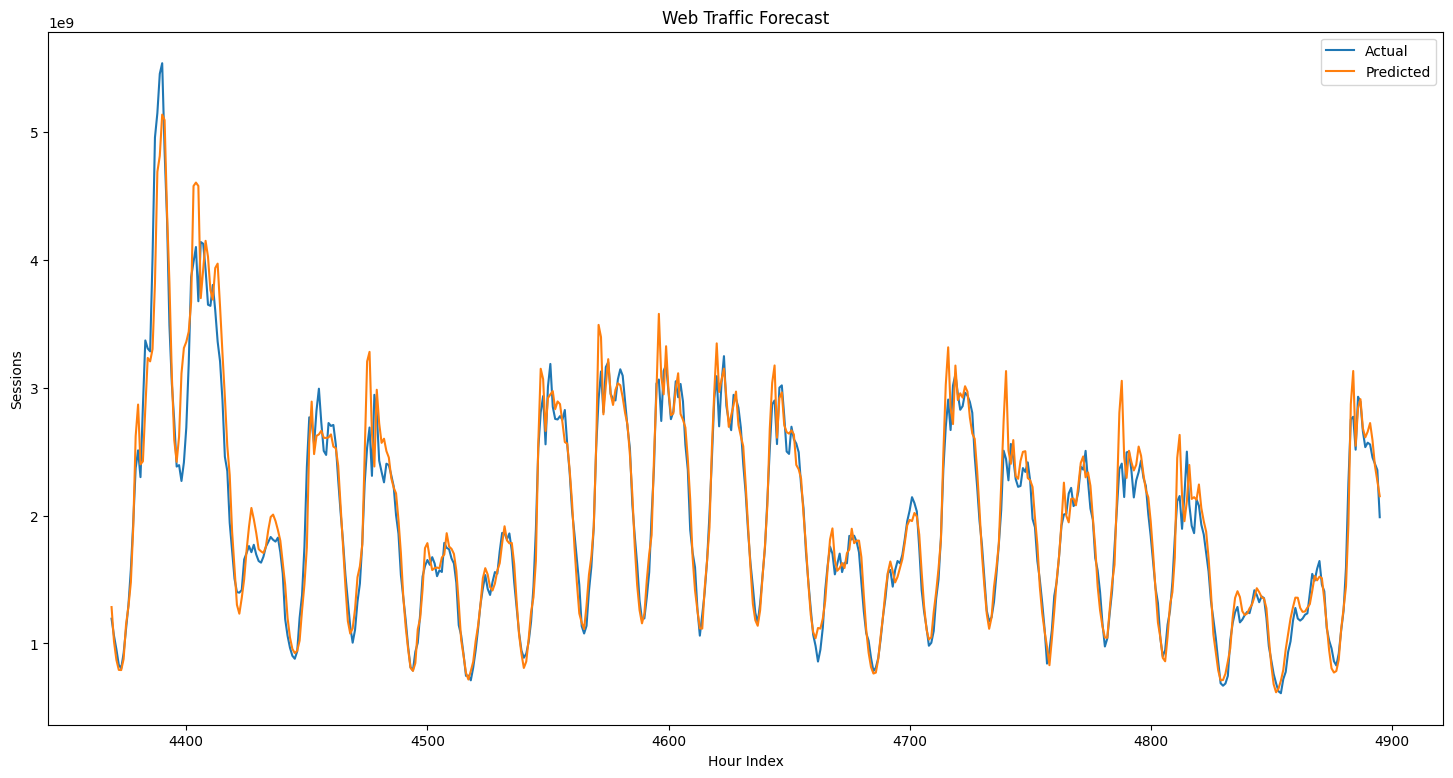

In [106]:
Hour_Index = np.arange(4369,4896)
plt.figure(figsize=(18, 9))
plt.plot(Hour_Index,y_test, label='Actual')
plt.plot(Hour_Index,y_pred, label='Predicted')
plt.xlabel('Hour Index')
plt.ylabel('Sessions')
plt.title('Web Traffic Forecast')
plt.legend()
plt.show()

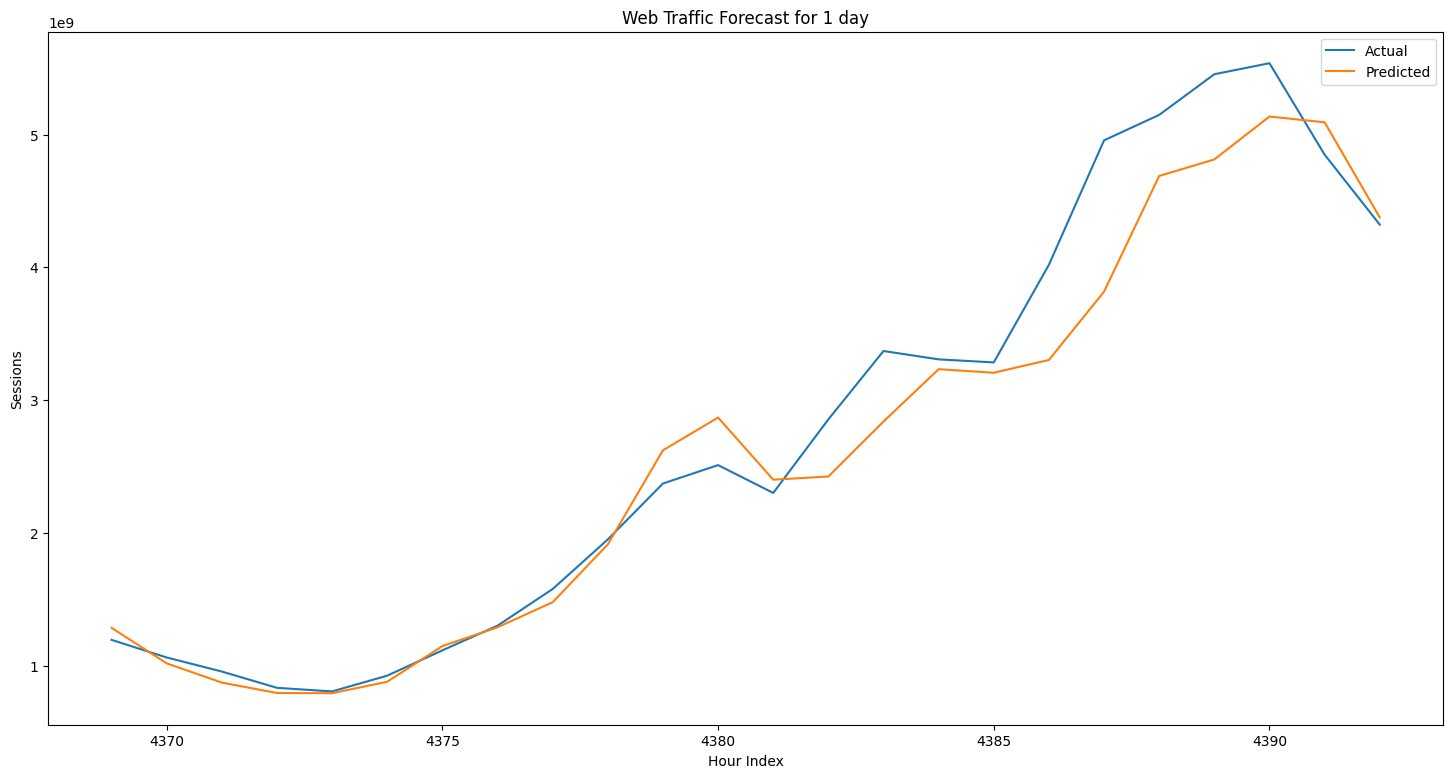

In [107]:
Hour_Index = np.arange(4369,4393)
plt.figure(figsize=(18, 9))
plt.plot(Hour_Index,y_test[0:24], label='Actual')
plt.plot(Hour_Index,y_pred[0:24], label='Predicted')
plt.xlabel('Hour Index')
plt.ylabel('Sessions')
plt.title('Web Traffic Forecast for 1 day')
plt.legend()
plt.show()

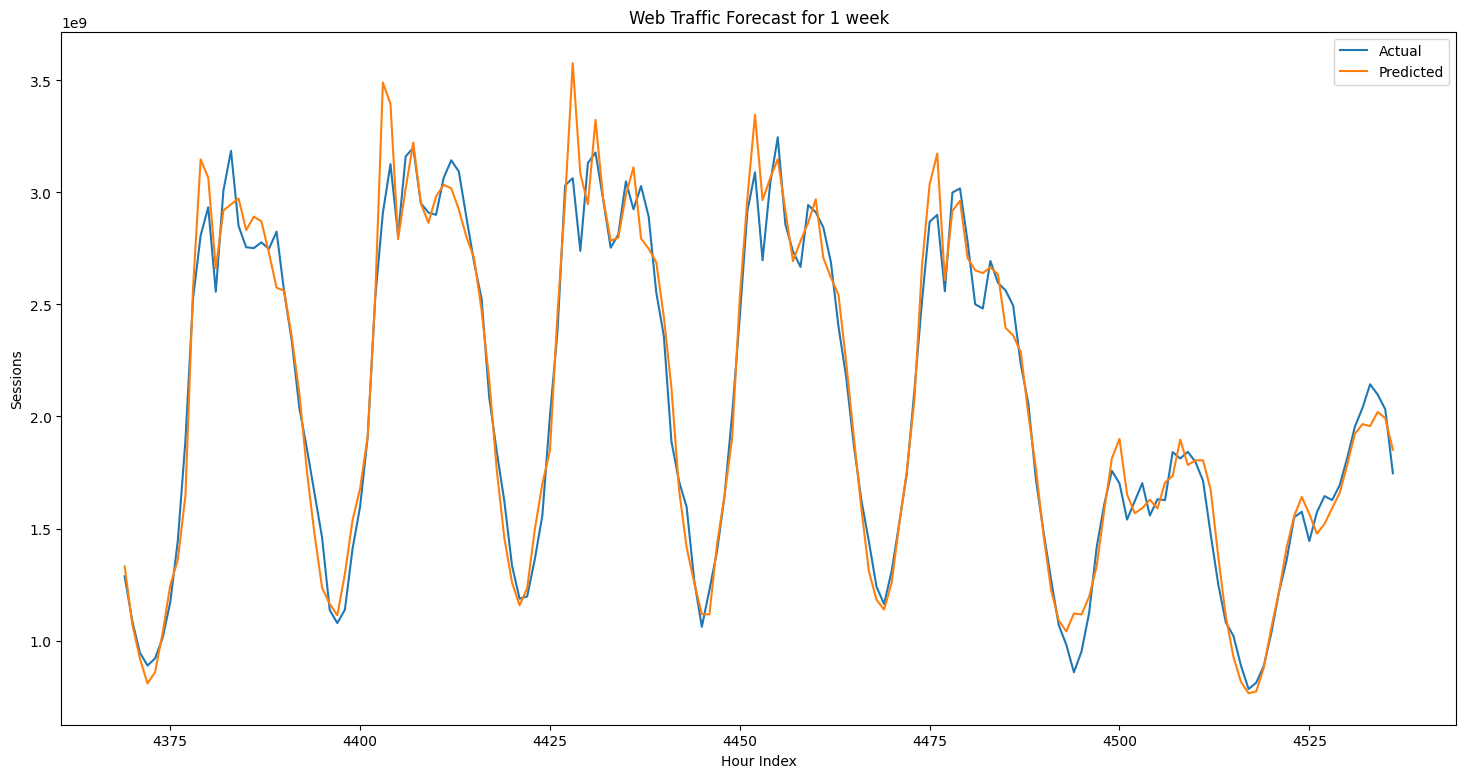

In [108]:
Hour_Index = np.arange(4369,4537)
plt.figure(figsize=(18, 9))
plt.plot(Hour_Index,y_test[168:336], label='Actual')
plt.plot(Hour_Index,y_pred[168:336], label='Predicted')
plt.xlabel('Hour Index')
plt.ylabel('Sessions')
plt.title('Web Traffic Forecast for 1 week')
plt.legend()
plt.show()